In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle
# hide_toggle(cnt=0)


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class="tocSkip"></a>

# Peak Finding <a class="tocSkip"></a>
## Using a simple method <a class="tocSkip"></a>

> Here we will find locations of peaks in a time series using a simple method.
>
> We will give some short code explanations, but in general we refer to the 
> [NumPy documentation](https://numpy.org).  You can skip the code explanations at first, but you may want to return to understand exactly what is being done. 

### Niels Bohr Institute <a class="tocSkip"></a>

### Christian Holm Christensen <a class="tocSkip"></a>

# Finde toppe <a class="tocSkip"></a>
## Ved brug af en enkel metode <a class="tocSkip"></a>

> Her finder vi placeringer af toppe i en tidsserie ved hjælp af en simpel metode.
>
> Vi vil give nogle korte forklaringer af koden, men generelt henviser vi til 
> [NumPys dokumentation](https://numpy.org).  Du kan i første omgang springe forklaringerne af koden over, men vend så tilbage senere for at forstå præcis hvad det er vi gør. 

### Niels Bohr Institute <a class="tocSkip"></a>

In [2]:
def gen_timeseries(signal,
                   maxt=100,
                   npeak=4,
                   width_range=(10,15),
                   amp_range=(15,30),
                   noise=.2):
    from numpy import linspace, max, ones, argsort
    from numpy.random import normal, uniform, randint, choice
    
    t = linspace(0,maxt,maxt+1)
    y = normal(3*noise,noise,size=len(t))
    
    s = max(width_range)
    p = choice(range(s,len(t)-s,s),size=npeak,replace=False)
    w = randint(*width_range,size=npeak)
    a = randint(*amp_range,size=npeak)

    for pp, ww, aa in zip(p,w,a):
        y[pp:pp+ww] += signal(aa,ww)
        
    i = argsort(p)
    return t, y, p[i], w[i]

def box(amplitude,width):
    return amplitude 

def trap(amplitude,width):
    from numpy import minimum, maximum, abs, arange
    from numpy.random import randint 
    
    r = randint(1,maximum(width//2,2))
    o = width/2 - abs(arange(width)-width/2)
    
    return amplitude * minimum(o / r, 1)

from numpy.random import seed 
seed(123456)

hide_toggle()

# A time series with sharp peaks

Suppose we have a time series like the one below 

# En tidsserie med skarpe toppe

Antag, at vi har en tidsserie som den nedenfor

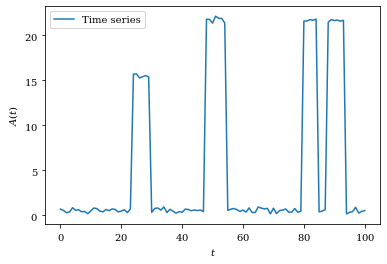

In [3]:
from matplotlib.pyplot import plot, xlabel, ylabel, legend
t, y, p, w = gen_timeseries(box,width_range=(5,8))
plot(t,y,label='Time series');
xlabel('$t$')
ylabel('$A(t)$');
legend();

> **Code explanation**
>
> The code that generates the sample is called `gen_timeseries`.  The code of that function is hidden in this note as it is by far the most complicated code of this note.  All you need to know here, is we can pass it a function to generate each signal peak, and other parameters that shape our time series amplitudes.  Look at the output and be satisfied that the variable `t` contains the time steps, `y` contains the amplitude at each time and `p` and `w` are the peak locations and widths. 
>
> We have plotted the known peak locations and end of the peaks too 

> **Forklaring af kode**
>
> Koden, der genererer prøven, kaldes `gen_timeseries`. Koden til denne funktion er skjult i denne note, da den er langt den mest komplicerede kode i denne note. Alt hvad du behøver at vide her, er at vi kan give den en funktion til at generere hvert signal, og andre parametre der former vores tidsserie-amplituder. Se på output og tilfredsstil dig med, at variablen 't' indeholder tidstrinnene, 'y' indeholder amplituden hver gang, og 'p' og 'w' er topplaceringerne og bredderne.

In this case, we have known peaks so that we may check our results.  Let us re-draw the graph with the peaks marked 

I dette tilfælde har vi kendt toppe, så vi kan kontrollere vores resultater. Lad os tegne grafen igen med topppene markeret

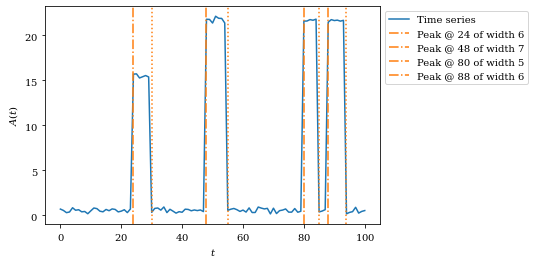

In [4]:
from matplotlib.pyplot import axvline 
plot(t,y,label='Time series');
for pp,ww in zip(p,w):
    axvline(pp,color='C1',ls='-.',label=f'Peak @ {pp:2d} of width {ww}')
    axvline(pp+ww,color='C1',ls=':')
xlabel('$t$')
ylabel('$A(t)$');
legend(loc='upper left',bbox_to_anchor=(1,1));

> **Code explanation**
>
> - First, we draw the time series.  Then, for each of the peak locations and widths stored in the variables `p` and `w`, we draw a horizontal line that spans the entire range of the ordinate ($y$-axis) using `axvline`.  
> - The function `zip` works as a zipper - for the sequences passed, say 
>
>    \begin{align*}
     p &= \begin{bmatrix} p_1\\ p_2\\ \vdots p_n\end{bmatrix} &   
     q &= \begin{bmatrix} q_1\\ q_2\\ \vdots q_n\end{bmatrix} 
     \end{align*}
>
>   it gives next element of each sequence.  Thus, for the above $p,q$, it first give $p_1,q_1$, the $p_2,q_2$, and so forth up to $p_n,q_n$. 
>
> - We pass some parameters to `legend` to put the legend _outside_ the axes. 

> **Forklaring af kode**
>
> - Først tegner vi tidsserien. Derefter tegner vi for hver topplacering og bredde gemt i variablerne `p` og `w`, en vandret linje, der spænder over hele rækkevidden for ordinaten ($y$-aksen) ved hjælp af `axvline`.
> - Funktionen `zip` fungerer som en lynlås - for de givne sekvenser, for eksempel 
>
>   \begin{align*}
     p &= \begin{bmatrix} p_1\\ p_2\\ \vdots p_n\end{bmatrix} &   
     q &= \begin{bmatrix} q_1\\ q_2\\ \vdots q_n\end{bmatrix} 
    \end{align*}
>
>   giver funktionen det næste element i hver sekvens. For ovennævnte $p,q$ giver den således først $p_1,q_1$, $p_2,q_2$ osv. op til $p_n,q_n$.
>
> - Vi videregiver nogle parametre til 'legende' for at sætte legenden _uden for_ akserne.

By eye it is pretty straight forward to find the peaks.  It is a little (but only a little) harder to get the computer to do it for us.  

Essentially, we want to find where the amplitude $A(t)$ changes rapidly.  That seems like good candidates for peaks.   We can find such places rather easily 

Med øjet er det temmelig ligetil at finde toppe. Det er lidt (men kun lidt) sværere at få computeren til at gøre det for os.

I det væsentlige ønsker vi at finde, hvor amplitude $A(t)$ ændrer sig hurtigt. Det virker som gode kandidater til toppe. Vi kan finde sådanne steder forholdsvist let

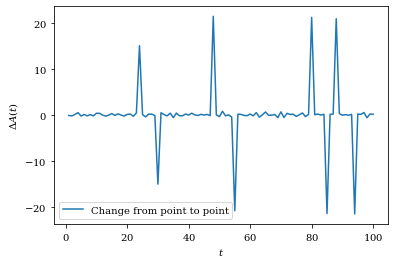

In [5]:
from numpy import diff
d = diff(y)
plot(t[1:],d,label='Change from point to point')
xlabel('$t$')
ylabel(r'$\Delta A(t)$');
legend();

> **Code explanation**
>
> The function `diff` calculates the difference between any two neighbors in the passed sequence.  Thus, given the sequence 
>
> $$p = \overbrace{(p_1,p_2,p_3,\ldots,p_{n-1},p_{n})}^{n\ \text{elements}}\quad,$$ 
>   
> it calculates 
>
> $$\Delta_i = p_{i+1} - p_{i}\quad\text{for}\quad i=1,\ldots,n-1\quad,$$ 
>
> or 
>
> $$\Delta_p = \overbrace{(\Delta_1,\Delta_2,\ldots,\Delta_{n-1})}^{n-1\ \text{elements}} = (p_2-p_1,p_3-p_1,\ldots,p_n-p_{n-1})\quad.$$
>
> One can think of `diff` as the _derivative_ of its argument with respect to the index. 

> **Forklaring af kode**
>
> Funktionen `diff` beregner forskellen mellem to naboer i sekvensen. Givet sekvensen
>
> $$p = \overbrace{(p_1,p_2,p_3,\ldots,p_{n-1},p_{n})}^{n\ \text{elementer}}\quad,$$
>
> beregner funktionen
>
> $$\Delta_i = p_{i+1} - p_{i}\quad\text{for}\quad i=1,\ldots,n-1\quad,$$
>
> eller
>
> $$\Delta_p = \overbrace{(\Delta_1,\Delta_2,\ldots,\Delta_{n-1})}^{n-1\ \text{elementer}} = (p_2-p_1,p_3-p_1,\ldots,p_n-p_{n-1})\quad.$$
>
> Man kan tænke på `diff` som den _afledte_ af dets argument med hensyn til indekset.

We see a lot of small changes corresponding to the noise in the amplitude.  But then we see 4 _large_ upward and 4 _large_ downward changes.   These are our peaks.  Next, we want to find these.  To get an idea of the size of the peaks, we can calculate the standard deviation of the difference in amplitude 

$$s_{\Delta A} = \sqrt{\frac{1}{N}\sum_i\left(\Delta A_i - \overline{\Delta A_i}\right)^2}\quad.$$ 

As long as we have a few peaks in the time series, then the standard deviation is a good estimator of our noise (which we want to ignore).

Vi ser en masse små ændringer svarende til støj i amplituden. Men så ser vi 4 _store_ opad og 4 _store_ nedadgående ændringer. Dette er vores toppe.Vi ønsker at finde placeringen af disse. For at få en idé om størrelsen af toppene kan vi beregne standardafvigelsen for forskellen i amplitude

$$s_{\Delta A} = \sqrt{\frac{1}{N}\sum_i\left(\Delta A_i - \overline{\Delta A_i}\right)^2}\quad.$$

Så længe vi har få toppe i tidsserien, er standardafvigelsen en god estimator for vores støj (som vi vil ignorere).

In [6]:
sd = d.std()
print(f'Standard deviation of ΔA: {sd:.3f}')

Standard deviation of ΔA: 5.610


> **Code explanation**
>
> The NumPy function `std` calculates the standard deviation of the passed sequence 
>
> $$x = (x_1,\ldots,x_n)\quad,$$ 
>
> as 
>
> $$s_x = \sqrt{\frac{1}{n}\sum_i^{n} (x_i-\overline{x})^2}\quad \overline{x} = \frac{1}{n}\sum_{i=1}^n x_i\quad.$$
>
> Above, we find the standard deviation of the _change_ in amplitude. 

> **Forklaring af kode**
>
> NumPy-funktionen `std` beregner standardafvigelsen for den beståede sekvens
>
> $$x = (x_1,\ldots,x_n)\quad,$$
>
> som
>
> $$s_x = \sqrt{\frac{1}{n}\sum_i^{n} (x_i-\overline{x})^2}\quad \overline{x} = \frac{1}{n}\sum_{i=1}^n x_i\quad.$$
>
> Ovenfor finder vi standardafvigelsen for _ændringen_ i amplitude.

Let us suppress all fluctuations smaller than this from our $\Delta A$ time series. 

Lad os undertrykke alle udsving, der er mindre end dette fra vores $\Delta A$-tidsserie.

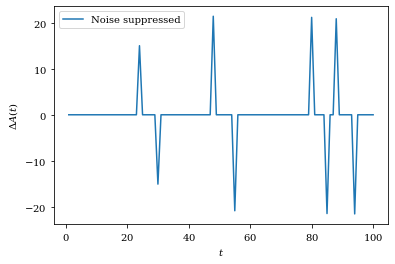

In [7]:
from numpy import abs 
d[abs(d)<sd] = 0
plot(t[1:],d,label='Noise suppressed')
xlabel('$t$')
ylabel(r'$\Delta A(t)$')
legend();

> **Code explanation**
>
> Take a look at the first line above 
>
>     d[abs(d)<sd] = 0 
>
> and lets work from the inside out.  
>
> - First, `abs(d)` calculates the absolute value of each and every element in the sequence `d` - that is, if `d` has $n$ elements, then `abs` will return $n$ elements.  
> - Next, we compare the absolute value of each element in `d` with the standard deviation stored in `sd`. If the condition `abs(d)<sd` is true for a given element, then we get the value `True` at that position, other wise false.  Thus, for each element in $d$, we will get back _either_ true _or_ false depending on whether the condition is met for that element.  Thus, we get $n$ boolean (true or false) values back from the comparison. 
> - Thirdly, we use the $n$-long boolean sequence to pick out the elements of `d` where the sequence contains `True`.  Thus, `d[abs(d)<sd]` selects exactly those elements where the absolute value of the _change_ in amplitude is smaller than the standard deviation of the change in amplitude. 
> - Finally, having selected the relevant elements, we assign the value zero to those elements. 
>
> The end result is as shown in the plot: All elements where the change in amplitude is small are set to 0, and we thus ignore them in the rest of the calculations. 

> **Forklaring af kode**
>
> Se på den første linje ovenfor
>
>     d[abs (d) <sd] = 0
>
> og lad os arbejde indefra og ud.
>
> - Først beregner `abs(d)` den absolutte værdi af hvert element i sekvensen `d` - det vil sige, hvis `d` har $n$-elementer, så returnerer `abs` $n$-elementer.
> - Derefter sammenligner vi den absolutte værdi af hvert element i `d` med standardafvigelsen, gemt i `sd`. Hvis betingelsen `abs (d) <sd` er sand for et givet element, får vi værdien `True` i den position, ellers `False`.  For hvert element i $d$ får vi således tilbage _enten_ sandt _eller_ falsk afhængigt af om betingelsen er opfyldt for det element. Således får vi $n$ boolske (sande eller falske) værdier tilbage fra sammenligningen.
> - For det tredje bruger vi den $n$-lange boolske sekvens til at udvælge elementerne i `d`, hvor sekvensen indeholder' True '. Således vælger `d[nabs (d) <sd]` nøjagtigt de elementer, hvor den absolutte værdi af _ændringen_ i amplitude er mindre end standardafvigelsen for ændringen i amplitude.
> - Til sidst, når vi har valgt de relevante elementer, tildeler vi værdien nul til disse elementer.
>
> Slutresultatet er som vist i plottet: Alle elementer, hvor ændringen i amplitude er lille, er sat til 0, og vi ignorerer dem derfor i resten af beregningerne.

To find the locations of the peaks in the time series, it is a simple matter of finding where the differences are larger than 0.  If we want to find the ends of the peaks, we can also do that by looking for changes that are less than zero. 

At finde placeringerne af toppe i tidsserien, er det en simpel sag at finde hvor forskellene er større end 0. Hvis vi ønsker at finde slutningen af toppene, kan vi også gøre det ved at se efter ændringer, der er mindre end nul.

In [8]:
from numpy import argwhere
ps = argwhere(d>0).ravel()
pe = argwhere(d<0).ravel()
print(f'Start of peaks: {ps}')
print(f'End of peaks:   {pe}')

Start of peaks: [23 47 79 87]
End of peaks:   [29 54 84 93]


> **Code explanation**
>
> The function `argwhere` returns a list of index where the condition passed is true.  Thus, in the two first lines above, we find the index (multiple) where the change in amplitude is either larger than 0 or smaller than 0 (remember, we removed all the noise previously). 
>
> The function `ravel` turns a multi-dimensional sequence into a one-dimensional sequence. We use this here to turn the lists of index from above into a more friendly vector of index. 

> **Forklaring af kode**
>
> Funktionen `argwhere` returnerer en liste af indeks, hvor den betingelsen er sand. I de to første linjer ovenfor finder vi således indeksene, hvor ændringen i amplitude enten er større end 0 eller mindre end 0 (husk, vi fjernede al støj tidligere).
>
> Funktionen `ravel` forvandler en flerdimensionel sekvens til en endimensional sekvens. Vi bruger dette her til at gøre listerne over indeks ovenfra til en mere venlig indeksvektor.

We will plot these on top of our original time series.  Note, when we calculated the difference, we get one less point than in the original time series.  Thus, we need to add one to each index found above to get the location in the original time series 

Vi vil plot disse oven på vores originale tidsserie. Bemærk, da vi beregnede forskellen, fik vi et mindre punkt end i den originale tidsserie. Derfor er vi nødt til at tilføje en til hvert indeks fundet ovenfor for at få placeringen i den originale tidsserie

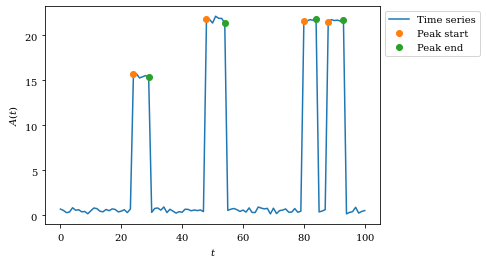

In [9]:
plot(t,y,label='Time series');
plot(t[ps+1],y[ps+1],'o',label='Peak start')
plot(t[pe],  y[pe],  'o',label='Peak end')
xlabel('$t$')
ylabel('$A(t)$');
legend(loc='upper left',bbox_to_anchor=(1,1));

> **Code explanation**
>
> Here we use the found index from above as index into our times and amplitudes.   That is 
>
>     t[x], y[x]
>
> where `x` is a list of index, will return the values at those index.  In this way, we pick out the times and amplitudes of the found peaks. 

> **Forklaring af kode**
>
> Her bruger vi det fundne indeks ovenfra som indeks til vores tider og amplituder. Det er
>
>     t[x], y[x]
>
> hvor `x` er en liste over indeks, returnerer værdierne ved det indeks. På denne måde vælger vi tidspunkter og amplituder for de fundne toppe.

As a final cross-check of our method, we check our found peak locations against the known locations 

Som en sidste krydstjek af vores metode tjekker vi vores fundne topplaceringer mod de kendte placeringer

In [10]:
from numpy import argsort, all
pi = argsort(p)
assert all(ps+1==p[pi]), f'Peak starts does not match: {ps+1} vs {p[pi]}'
assert all(pe-ps==w[pi]), f'Peak widths does not match {pe-ps} vs {w[pi]}'

The fact that we see no error message from above indicates that we got it right. 

Det faktum, at vi ikke ser nogen fejlmeddelelse ovenfra indikerer, at vi fik de rigtigte værdier.

> **Code explanation**
>
> When we constructed our peaks above, we could get them in _any_ order.  But when we find our peaks using the method above, we will get them in order.   Thus, to compare the known and found peak locations and widths, we first have to sort the generated peaks and widths by the time index.   The function `argsort(x)` returns the index array `i` that would, if applied to `x` produce a sorted sequence.  We use these sorting index to compare our known peak locations and width to the found same. 
>
> The keyword `assert` will break the execution if it's first argument evaluates to false.  Thus, if we see no errors, then it means that the condition passed to `assert` was fulfilled. 

> **Forklaring af kode**
>
> Da vi konstruerede vores toppe ovenover, kunne vi få dem i _hvilken som helst_ rækkefølge. Men når vi finder vores toppe ved hjælp af metoden ovenfor, får vi dem i rækkefølge. For at sammenligne de kendte og fundne topplaceringer og bredder skal vi først sortere de genererede toppe og bredder efter tidsindekset. Funktionen `argsort(x)` returnerer indeksfeltet `i`, som, hvis det anvendes på `x`, producerer en sorteret sekvens. Vi bruger disse sorteringsindeks for at sammenligne vores kendte topplaceringer og bredde med det fundne.
>
> Nøgleordet `assert` (_hævde_) vil stoppe progammet, hvis det første argument evalueres til falsk. Så hvis vi ikke ser nogen fejl, betyder det, at betingelsen, der blev overført til `assert` var opfyldt.

As a final thing of this section, we will implement a function that finds the peaks.  

Som en sidste ting i dette afsnit implementerer vi en funktion, der finder toppene.

In [11]:
def find_sharp_peaks(t,y,nstd=1):
    from numpy import diff, argwhere
    
    d  = diff(y)
    sd = nstd * d.std()
    ps = argwhere(d> sd).ravel()
    pe = argwhere(d<-sd).ravel()
    
    assert len(pe)==len(ps),f'Found incompatible start {ps} and end {pe}'
    return ps+1,pe-ps

> **Code explanation**
>
> The function above accepts the time series (`t`,`y`) and the number of standard deviations to ignore (`nstd` - not necessarily a whole number).  
>
> - It differentiate the amplitudes to get $\Delta A_i$,
> - Calculates the standard deviation of this difference $s_{\Delta A}$
> - Select index where $\Delta A_i > s_{\Delta A}$ and $\Delta < s_{\Delta A}$ for starts and ends of the peaks, respectively
> - Finally it returns the index of the location and widths of the peaks. 

> **Forklaring af kode**
>
> Funktionen ovenfor accepterer tidsserien (`t`,` y`) og antallet af standardafvigelser, der skal ignoreres (`nstd`- ikke nødvendigvis et helt tal).
>
> - Differentiere amplituderne for at få $\Delta A_i$,
> - Beregner standardafvigelsen af denne forskel $s_{\Delta A}$
> - Vælger indeks, hvor $\Delta A_i > s_{\Delta A}$ og $\Delta < s_{\Delta A}$ for henholdsvis start og slut af toppene
> - Returnerer indeks for positionen og bredden af toppene.

We execute the above function on our data and print out the results

Vi udfører funktionen på vores data og udskriver resultaterne

In [12]:
ps, pw = find_sharp_peaks(t,y)
print(f'Peak locations - found {ps} true {p}')
print(f'     widths            {pw} true {w}')

Peak locations - found [24 48 80 88] true [24 48 80 88]
     widths            [6 7 5 6] true [6 7 5 6]


We want to plot the result of the analysis. However, as we will do this over and over again, we code it up in a short function so that we do not have to repeat the same code over and over again (possibly introducing problems each time).

Vi vil lave en graf af resultatet af analysen. Da vi imidlertid gør det igen og igen, koder vi det op i en kort funktion, så vi ikke behøver at gentage den samme kode igen og igen (og muligvis introduktion af problemer hver gang).

In [13]:
def plot_peaks(t,y,p,w,ps,pw):
    from matplotlib.pyplot import plot, xlabel, ylabel, legend
    
    plot(t,y,'.-',label='Time series');
    plot(t[ps],   y[ps],   'o',label='Found peak start')
    plot(t[ps+pw],y[ps+pw],'o',label='  -    -   end')
    plot(t[p],    y[p],    's',mfc='none',ms=10,label='True peak start')
    plot(t[p +w], y[p +w], 's',mfc='none',ms=10,label='  -    -   end')
    xlabel('$t$')
    ylabel('$A(t)$');
    legend(loc='upper left',bbox_to_anchor=(1,1));

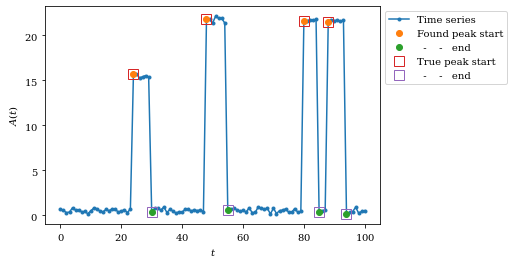

In [14]:
plot_peaks(t,y,p,w,ps,pw)

> **Code explanation**
>
> The function above takes 6 arguments 
>
> - The time series $t,A(t)$ as parameters `t` and `y` 
> - The known (true) peak locations and widths as `p` and `w` 
> - The found peak locations and widths as `ps` and `pw`. 
>
> The argument `mfc='none'` makes the markers hollow, and `ms=10` enlarges the markers. 

> **Forklaring af kode**
>
> Funktionen ovenfor tager 6 argumenter
>
> - Tidsserien $t,A(t)$ som parametre `t` og` y`
> - De kendte (sande) placeringer og bredder af toppene som `p` og `w`
> - De fundne topplaceringer og -bredder som `ps` og `pw`.
>
> Argumentet `mfc='none'` gør markørerne hule, og  `ms=10` forstørrer markørerne.

# A time series with softer peaks

# En tidserie med blødere toppe

Here, we generate a time series where the peaks are not as sharp as in the previous example. 

Her genererer vi en tidsserie, hvor toppe ikke er så skarpe som i det foregående eksempel.

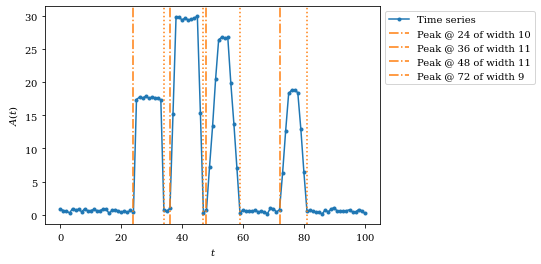

In [15]:
t, y, p, w = gen_timeseries(trap,width_range=(8,12))

plot(t,y,'.-',label='Time series')
for pp,ww in zip(p,w):
    axvline(pp,color='C1',ls='-.',label=f'Peak @ {pp:2d} of width {ww}')
    axvline(pp+ww,color='C1',ls=':')
xlabel('$t$')
ylabel('$A(t)$');
legend(loc='upper left',bbox_to_anchor=(1,1));

> **Code explanation**
>
> Here, we pass the function `trap` (before it was `box`) which generates a trapezoid signal shape, and we make the peaks wider to allow for a softer rise (and decline) of the signal. 

> **Forklaring af kode**
>
> Her giver vi funktionen `trap` (før var det `box`), som genererer et trapesformet signal, og vi gør toppe bredere for at give mulighed for en blødere stigning (og fald) af signalet.

The algorithm we applied to the sharply peak signals in the previous section will not work for these kinds of signals.  We can run our function `find_sharp_peaks` on the data above to see that. 

Algoritmen, vi anvendte til de skarpe signaler i det foregående afsnit, fungerer ikke for denne slags signaler. Vi kan køre vores funktion `find_skarpe_peaks` på dataene ovenover for at se det.

In [16]:
from sys import stderr 
try:
    find_sharp_peaks(t,y)
except Exception as e: 
    print(e,file=stderr)

> **Code explanation**
>
> We execute the function within a `try...except` block.  This means that if the function fails (as it does), we can catch the error in the `except` part of the block and gracefully handle the error.  The variable `sys.stderr` represents the _standard error_ output stream where we normally will write errors to. 

> **Forklaring af kode**
>
> Vi udfører funktionen inden for en `try...except` -blok. Dette betyder, at hvis funktionen mislykkes (som den gør), kan vi opfange fejlen i `except` delen af blokken og behageligt håndtere fejlen. Variablen `sys.stderr` repræsenterer _standardfejl_ output, hvor vi normalt vil skrive fejl til.

## A threshold method for finding peaks

## En tærskelmetode til at finde toppe

A simple method to find the peaks is to introduce a _threholds_ $T$ which we must determine "by hand". We will then set as a requirement for a peak that 

\begin{align*}
  s &= \{i:\ A_{i-1} \le T \wedge A_{i} > T\}\\
  e &= \{i:\ A_{i-1} >   T \wedge A_{i} \le T\}\quad,
\end{align*}

for start and end of a peak, respectively ($\wedge$ is logical _and_). 

We can quite easily implement this. Here, we set $T=8$. 

En enkel metode til at finde toppene er at introducere en _tærskel_ $T$, som vi skal bestemme "for hånden". Vi vil derefter stille som et krav til en top

\begin{align*}
  s &= \{i:\ A_{i-1} \le T \wedge A_{i} > T\}\\
  e &= \{i:\ A_{i-1} >   T \wedge A_{i} \le T\}\quad,
\end{align*}

for henholdsvis start og slutning af en top ($\wedge$ er logisk _og_).

Vi kan ganske let implementere dette. Her satte vi $T=8$.

In [17]:
from numpy import where, logical_and
T  = 8
ps = where(logical_and(y[:-1] <= T, y[1:] >  T))[0]
pe = where(logical_and(y[:-1] >  T, y[1:] <= T))[0]+1
pw = pe-ps 
print(f'Peak locations - found {ps} true {p}')
print(f'     widths            {pw} true {w}')

Peak locations - found [24 36 49 73] true [24 36 48 72]
     widths            [10 11  9  7] true [10 11 11  9]


> **Code explanation**
>
> Working from the inside out of the second line above (the third line uses similar rationals). 
>
> - `y[:-1]` selects all elements of `y` _up to, but not including_ element `-1`.  Negative index correspond to counting _backwards_ in the sequence so that `-1` is the _last_ element of the sequence (`-2` is the second to last, and so on).  If the sequence is 
>   $$y = \overbrace{(y_1,y_2,\ldots,y_n)}^{n\ \text{elements}}\quad,$$ 
>   then the above will select 
>   $$ y\setminus y_n = \overbrace{(y_1,y_2,\ldots,y_{n-1})}^{n-1\ \text{elements}}\quad.$$
> - `y[1:]` selects all elements of `y` _starting at the second_ element.  Thus, with the same sequence as above, we would get 
>
>   $$ y\setminus y_1 = \overbrace{(y_2,\ldots,y_{n-1})}^{n-1\ \text{elements}}\quad.$$
> - For both `y[:-1] <= T` and `y[1:] > T` we have already see that produces a sequence of $n-1$ boolean values. Looking at the two resulting sets in the bullets above, and pairing them up one by one, we see that this corresponds exactly to the requirement put up above. 
> - The function `logical_and` - as the name suggests - does a logical _and_ comparison of the two arguments.  If the arguments are sequences, then the comparison is done element-by-element.  This is what pairs up the elements of the two resulting sequences from the bullets above.  The result is a single sequence of boolean values - `True` where the time series crosses the threshold and `False` everywhere else.  
>

> **Forklaring af kode**
>
> Vi arbejder indefra og ud af den anden linje ovenfor (den tredje linje bruger lignende rationaler).
>
> - `y[:-1]` vælger alle elementer i `y` _op til, men ikke med_ element `-1`. Negative indeks svarer til at tælle _baglæns_ i sekvensen, således at `-1` er det _sidste_ element i sekvensen (`-2` er det næstsidste og så videre). Hvis sekvensen er
>   $$y = \overbrace{(y_1,y_2,\ldots,y_n)}^{n\ \text{elements}}\quad,$$
>   vælger ovenstående
>   $$ y\setminus y_n = \overbrace{(y_1,y_2,\ldots,y_{n-1})}^{n-1\ \text{elements}}\quad.$$
> - `y[1:]` vælger alle elementer i `y` _startende ved det andet_ element. Således vil vi med den samme sekvens som ovenfor få
>   $$ y\setminus y_1 = \overbrace{(y_2,\ldots,y_{n-1})}^{n-1\ \text{elements}}\quad.$$
> - For både `y[:-1] <= T` og` y [1:]> T` har vi allerede set, at vi får en $n-1$ lang sekvens af boolske værdier. Når vi ser på de to resulterende sæt i punkterne ovenfor og parrer dem op en ad gangen, ser vi, at dette svarer nøjagtigt til kravet, der er stillet ovenfor.
> - Funktionen `logical_and` - som navnet antyder - udfører en logisk_ og_ sammenligning af de to argumenter. Hvis argumenterne er sekvenser, foretages sammenligningen element for element. Det er her elementerne i de to resulterende sekvenser fra punkterne ovenfor, pares. Resultatet er en enkelt sekvens af boolske værdier - `True`, hvor tidsserien krydser tærsklen og `False` ellers.

Let us plot the result (using our plotting function) as well as the threshold applied.

Lad os lave en graf af resultatet (ved hjælp af vores plottefunktion) og den anvendte tærskel.

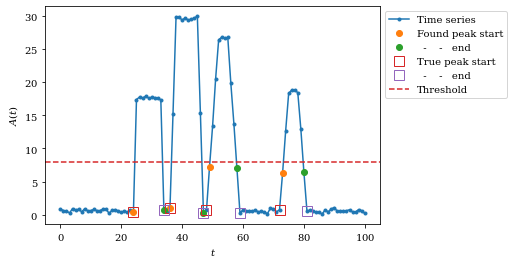

In [18]:
from matplotlib.pyplot import axhline
plot_peaks(t,y,p,w,ps,pw)
axhline(T,ls='--',color='C3',label='Threshold');
legend(loc='upper left',bbox_to_anchor=(1,1));

Generally, the algorithm performs OK.  If, however the peaks have a lot of noise in the climp, then this will break down.  Secondly, we often do not select the "true" start of peak but rather where the signal crossed the threshold.  Of course, we can set the threshold lower, but then we risk picking up peaks in the noise - which we certainly do not want. 

On the plus side, this algorithm is dead easy to implement - in fact, it is a similar algorithm used any many oscilloscopes.  However, an oscilloscope needs to operate in _real time_ - while we, doing off-line analysis has the luxury of time (relatively speaking).  Finally, we have made no hard algorithm for choosing the threshold - it is largely a choice of the analyser that can only be done [_a posteriori_](https://en.wikipedia.org/wiki/A_priori_and_a_posteriori).  We can define procedures for algorithmically choosing the threshold $T$ (such as scans, mean value, median, and so on), but in the end the choice is hard to do without having done the analysis first. 

Generelt klarer algoritmen sig OK. Hvis toppene dog har meget støj i opstigning, vil dette bryde sammen. For det andet finder vi ofte ikke den "rigtige" start på toppen, men snarere hvor signalet krydsede tærsklen. Selvfølgelig kan vi indstille tærsklen lavere, men så risikerer vi at samle toppe i støj op - hvilket vi bestemt ikke ønsker.

På plussiden er denne algoritme død let at implementere - i virkeligheden er det en lignende algoritme, der anvendes i mange oscilloskoper. Imidlertid er et oscilloskop nødt til at fungere i _realtid_ - mens vi, som udfører off-line-analyse, har tidens luksus (relativt set). Endelig har vi ikke lavet nogen hård algoritme til at vælge tærsklen - det er stort set et valg, der kun kan udføres [_en posteriori_](https://da.wikipedia.org/wiki/A_priori_and_a_posteriori). Vi kan definere procedurer til algoritmisk valg af tærskelen $T$ (såsom skanninger, middelværdi, median osv.), Men i sidste ende er valget svært at gøre uden at have lavet analysen først.

Before we leave this section, will we code the above method as a function.

Inden vi forlader dette afsnit, vil vi kode ovenstående metode som en funktion.

In [19]:
def find_threshold_peaks(t,y,threshold):
    from numpy import logical_and, where

    ps = where(logical_and(y[:-1] <= threshold, 
                           y[1:]  >  threshold))[0]
    pe = where(logical_and(y[:-1] >  threshold, 
                           y[1:]  <= threshold))[0]+1
    if ps.shape != pe.shape:
        return ps, None 
    return ps, pe-ps 

## A method based on differences

## En metode basert på differencer 

Given the short-comings of the threshold method, we want to expand upon the method for sharp peaks we implemented earlier.  We saw that that method broke down when the rise of the peaks was softer than our initial data set.  The problem is, that the differential may be larger than the standard deviation over a sustained period of time if the peak evolves (relatively) slowly.  Thus, we need to find a way where we can filter out these consecutive large differentials. 

I betragtning af manglerne af tærskelmetoden ønsker vi at udvide metoden til skarpe toppe, vi implementerede tidligere. Vi så, at denne metode brød sammen, når stigningen af toppene var blødere end vores oprindelige datasæt. Problemet er, at forskellen kan være større end standardafvigelsen over et vedvarende tidsrum, hvis toppen udvikler sig (relativt) langsomt. Derfor er vi nødt til at finde en måde, hvorpå vi kan filtrere ud disse på hinanden følgende store forskelle.

We start out as we did before - by 

- calculating the difference of neighboring amplitudes 
- calculating the standard deviation of the differences 
- selecting those index where the difference is larger or smaller than standard deviation for the start and end, respectively, of the peaks. 

Vi starter som vi gjorde før - 

- beregning af forskellen mellem nabo amplituder
- beregning af standardafvigelsen af forskellene
- valg af de indeks, hvor forskellen er større eller mindre end standardafvigelsen for henholdsvis starten og slutningen af toppene.

In [20]:
d  = diff(y)
sd = d.std()
d[abs(d)<sd] = 0

Let us plot the time series of the noise suppressed differences.

Lad os tegne tidsserieren af forskellene hvor støjen er undertrykt.

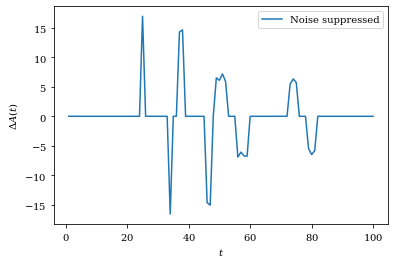

In [21]:
plot(t[1:],d,label='Noise suppressed')
xlabel('$t$')
ylabel(r'$\Delta A(t)$')
legend();

We see, as we suspected, that we have many consecutive values that are either above or below zero.  This is the challenge.  Before we address that challenge, we still want to get the index where the difference is either larger or smaller than 0. 

Som vi har mistanke om, ser vi, at vi har mange på hinanden følgende værdier, der enten er over eller under nul. Dette er udfordringen. Før vi løser denne udfordring, ønsker vi stadig at få indeks, hvor forskellen enten er større eller mindre end 0.

In [22]:
tps = argwhere(d > 0).ravel()
tpe = argwhere(d < 0).ravel()
print(f'Starts: {tps}')
print(f'Ends:   {tpe}')

Starts: [24 36 37 48 49 50 51 72 73 74]
Ends:   [33 45 46 55 56 57 58 78 79 80]


From the print out above, we clearly see issue - consecutive index corresponding to a single peak, and possibly different number of starts and ends. 

Let us plot these (setting all width to 0) to get a feel for it. 

Fra udskriften ovenfor ser vi tydeligt problemet - sammenhængende indeks svarende til en enkelt top, og muligvis forskellige antal starter og ender.

Lad os plotte disse (indstille hele bredden til 0) for at få en fornemmelse af det.

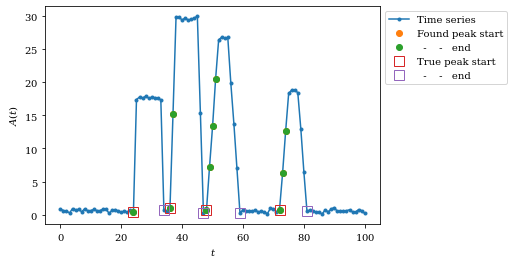

In [23]:
from numpy import zeros_like
plot_peaks(t,y,p,w,tps,zeros_like(tps))

Now we are ready to address the challenge.  We will use the same philosophy as we did when we found the _candidates_ for the peaks.  That is, 

- we calculate the differences once again, _but this time on the candiate index_
- then we filter out any index where the previous one was one smaller.  This will catch one peak less than needed, so we must expand the sequences of candidate index 
  - For the sequence of start index candidates, we _prepend_ a `-1` 
  - For the sequence of end index candidates, we _append_ the maximum index plus one

Nu er vi klar til at tackle udfordringen. Vi vil bruge den samme filosofi, som vi gjorde, da vi fandt _kandidaterne_ til toppene. Det vil sige,

- vi beregner forskellene igen, _men denne gang på candiate-indeksene_
- derefter filtrerer vi ethvert indeks, hvor det forrige var én mindre. Dette vil fange en top mindre end nødvendigt, så vi må udvide sekvenserne for kandidatindeksene
  - For rækkefølgen af startindeks-kandidater føjer vi et `-1` til starten
  - For rækkefølgen af slutindeks-kandidater tilføjer vi det maksimale indeks plus et, til slutningen

In [24]:
from numpy import concatenate
ttps = concatenate(([-1],tps))
ttpe = concatenate((tpe,[len(t)+1]))
ps   = tps[where(diff(ttps) != 1)[0]]
pe   = tpe[where(diff(ttpe) != 1)[0]]+1
pw   = pe-ps 
print(f'Peak locations - found {ps} true {p}')
print(f'     widths            {pw} true {w}')

Peak locations - found [24 36 48 72] true [24 36 48 72]
     widths            [10 11 11  9] true [10 11 11  9]


> **Code explanation**
>
> - In the first two lines, we expand the candidate sequences as outlined above.  
>   - We prepend a `-1` to the candidates for the peak start 
>   - We append the maximum index plus one to the candidates for peak end 
> - Then we calculate the difference of the index and select those index where the difference from the previous was _not_ one

> **Forklaring af kode**
>
> - I de første to linjer udvider vi kandidatsekvenserne som beskrevet ovenfor.
>   - Vi føjer et `-1` til kandidaterne til top-start til starten
>   - Vi føjer det maksimale indeks plus et til kandidaterne til top-slut til slutningen
> - Derefter beregner vi forskellen på indekset og vælger de indeks, hvor forskellen fra det forrige _ikke_ var én 

Let us plot the results of this analysis. 

Lad os lave en graf over resultaterne af denne analyse.

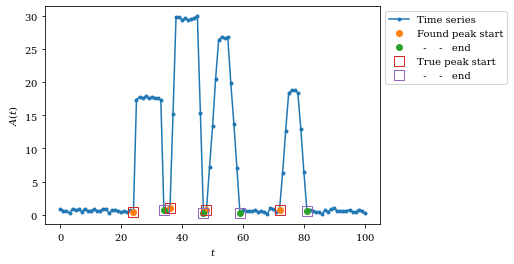

In [25]:
plot_peaks(t,y,p,w,ps,pw)

We see that the algorithm finds the peaks rather well.   Unlike the threshold method above, we have not introduced any free parameters.  We may want to vary the number of standard deviations we want to ignore, but such a parameter has a clear statistical meaning which we can choose _a priori_.  

This method is however far from perfect.  If the raise time of the signal is comparable to the noise (fluctuations in the background) - meaning that the signal rises at more or less the same speed as the noise - then this algorithm may miss peaks, find too many peaks, or find too many start or end points. 

Before we leave, we once again code this algorithm as a single function.

Vi ser, at algoritmen finder toppene ret godt. I modsætning til tærskelmetoden ovenfor har vi ikke introduceret nogen free parametre. Vi ønsker måske at ændre antallet af standardafvigelser, vi vil ignorere, men en sådan parameter har en klar statistisk betydning, som vi kan vælge _a priori_.

Denne metode er imidlertid langt fra perfekt. Hvis signalets stigningstid er sammenlignelig med støjen (udsving i baggrunden) - hvilket betyder, at signalet stiger med mere eller mindre den samme hastighed som støjen - kan denne algoritme gå glip af toppe, finde for mange toppe eller finde for mange start- eller slutpunkter.

Før vi slutter, koder vi igen denne algoritme som en enkelt funktion.

In [26]:
def find_peaks(t,y,nsd=1,maxd=1):
    from numpy import diff, argwhere, where, concatenate,\
        abs, logical_or, logical_and
    
    d    = diff(y)
    sd   = d.std()
    tps  = argwhere(d >  nsd * sd).ravel()
    tpe  = argwhere(d < -nsd * sd).ravel()
    ttps = concatenate(([-1],tps))
    ttpe = concatenate((tpe,[len(t)+maxd+1]))
    ps   = tps[where(diff(ttps) > maxd)[0]]
    pe   = tpe[where(diff(ttpe) > maxd)[0]]+1
    
    if pe.shape != ps.shape:
        return ps, None
    
    pw = pe - ps
    return ps, pw 

Above, we made one refinement - we added the parameter `maxd` which we can set to suppress fluctuations in the peaks.  Essentially, by setting this to a value larger than 1, we do not only consider neighbors in the candidates, but also the `maxd`'th neighbor.  E.g., if `maxd=2`, we also consider the neighbor one over to be in the same peak.  This parameter is difficult to set _a priori_, unless we expect large fluctuations in the peak plateau.  Most of the time, we can get by with `maxd=1`. 

Ovenover har vi lavet en forfining - vi tilføjede parameteren `maxd`, som vi kan indstille til at undertrykke udsving i toppene. Ved at sætte denne til en værdi, der er større end 1, overvejer vi ikke kun naboer i kandidaterne, men også op til den `maksd` nabo. For eksempel, hvis `maxd=2`, betragter vi også genboen at være i samme top. Denne parameter er vanskelig at indstille _a priori_, medmindre vi forventer store udsving i top-plateauet. Det meste af tiden kan vi klare os med `maxd = 1`.

# Comparison of methods

# Sammenligning af metoder

Below we will run some comparisons of the two methods developed in the last section.  First, however, we define a function to plot our results 

In [27]:
def plot_both(t,y,p,w,pt,wt,ps,pw,threshold):
    from matplotlib.pyplot import plot, figure,xlabel, ylabel, legend, axhline
    from matplotlib.lines import Line2D
    
    def one(p,w,c,label='',ms=10,mfc=None):
        if mfc is None:
            mfc = c
        if p is not None:
            plot(t[p],  y[p],  '^',color=c,ms=ms,mfc=mfc)
        if w is not None:
            plot(t[p+w],y[p+w],'v',color=c,ms=ms,mfc=mfc)
        
        return Line2D([],[],marker='o',color=c,mfc=mfc,ms=ms,
                      label=label)
    
    aa = []
    aa.append(plot(t,y,'.-',label='Time series')[0])
    aa.append(axhline(threshold,ls=':',color='C4',label='Threshold'))
    aa.append(Line2D([],[],marker='^',color='k', label='Start'))
    aa.append(Line2D([],[],marker='v',color='k', label='End'))
    aa.append(one(pt,wt,'C1','Threshold'))
    aa.append(one(ps,pw,'C2','Difference',15,'none'))
    aa.append(one(p, w, 'C3','True',20,'none'))
            
    xlabel('$t$')
    ylabel('$A(t)$');
    legend(aa, [a.get_label() for a in aa],
           loc='upper left',bbox_to_anchor=(1,1));

We also write a function that 

- Accepts a sample `t`,`y`,`p`,`w`
- Runs the two methods on the sample
- Plots the result 

In [28]:
def run(t,y,p,w,threshold=10,nsd=1,maxd=1):
    from matplotlib.pyplot import figure 
    pt, wt = find_threshold_peaks(t,y,threshold)
    ps, pw = find_peaks(t,y,nsd,maxd)
    
    print('Peak Locations:\n'
          f'  True:       {p}'  + '\n'
          f'  Threshold:  {pt}' + '\n'
          f'  Difference: {ps}')
    print('  -   Widths:\n'
          f'  True:       {w}'  + '\n'
          f'  Threshold:  {wt}' + '\n'
          f'  Difference: {pw}')

    
    figure(figsize=(8,8))
    plot_both(t,y,p,w,pt,wt,ps,pw,threshold)

Peak Locations:
  True:       [15 45 60 75]
  Threshold:  [16 46 60 76]
  Difference: [15 45 60 75]
  -   Widths:
  True:       [11 11 10 11]
  Threshold:  [ 9  9 10  9]
  Difference: [11 11 10 11]


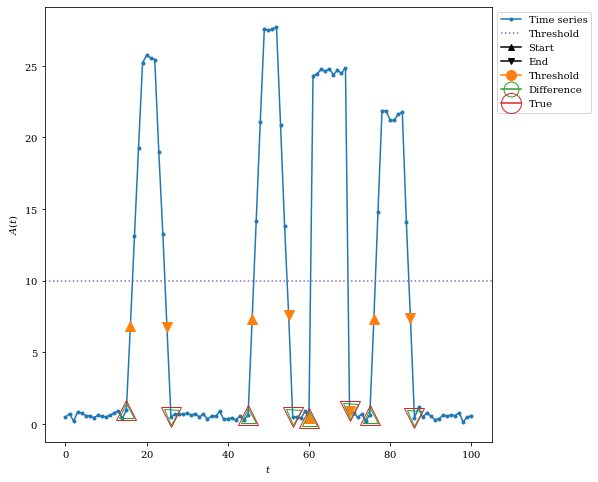

In [29]:
run(*gen_timeseries(trap))

Peak Locations:
  True:       [15 30 60 75]
  Threshold:  [16 30 61 75]
  Difference: [15 30 60 75]
  -   Widths:
  True:       [11 10 14 12]
  Threshold:  [ 9 10 12 12]
  Difference: [11 10 14 12]


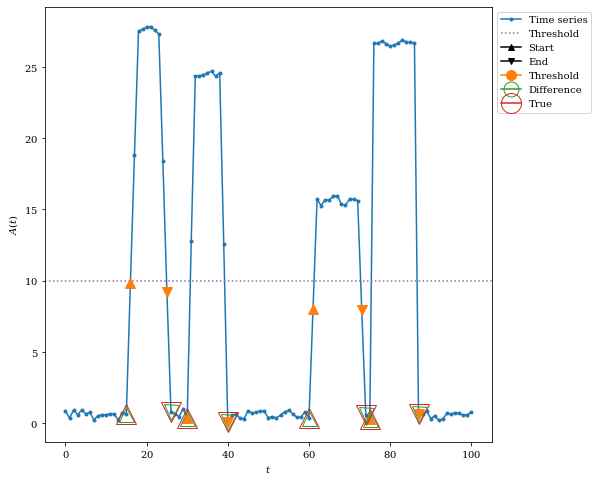

In [30]:
run(*gen_timeseries(trap))

Peak Locations:
  True:       [15 45 60 75]
  Threshold:  [15 46 60 75]
  Difference: [15 47 49 60 75]
  -   Widths:
  True:       [12 13 13 10]
  Threshold:  [12 11 13 10]
  Difference: None


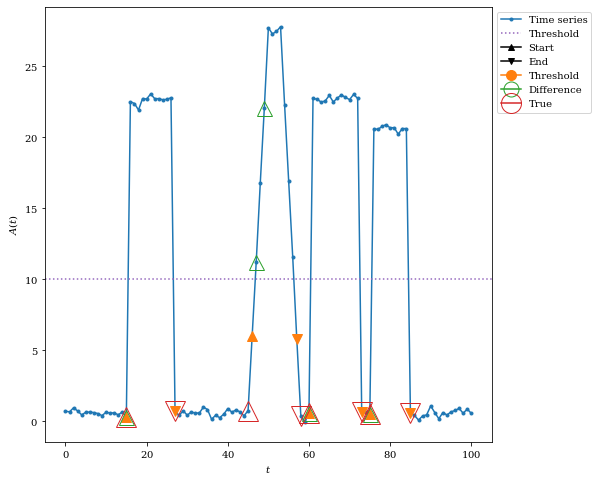

In [31]:
run(*gen_timeseries(trap))